<a href="https://colab.research.google.com/github/erialc-cal/StatApp_2020/blob/main/Moyennes_mobiles_ecarts_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
ensae = pd.read_csv("/content/drive/MyDrive/Statapp/database_sieges.csv",low_memory=False,decimal=',')

In [47]:
ensae = ensae.sort_values(by='Date')

In [48]:
ensae = ensae.astype({'Date':'datetime64[ns]', 'MVT':'float64', 'PAX':'float64', 
                      'Date Equiv':'datetime64[ns]', 'MVT_FQM':'float64', 'PAX_FQM':'float64',
                      'Coeff_Rempl_FQM':'float64', 'Sièges Corrections_ICI':'float64'})

In [49]:
pd.unique(ensae['Terrain'])

array(['ORLY'], dtype=object)

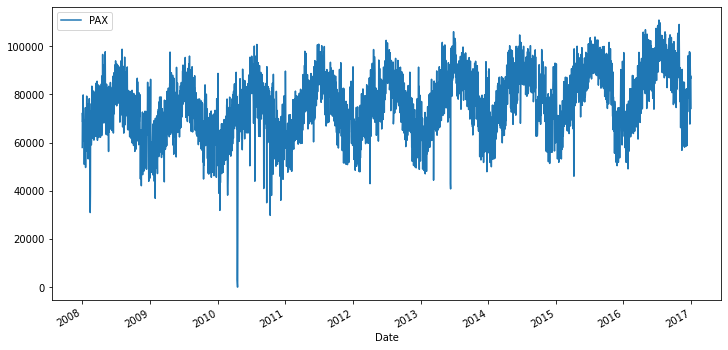

In [50]:
fig, ax = plt.subplots(figsize=(12,6))
ensae[['Date','PAX']].groupby('Date').agg({'PAX':'sum'}).plot(ax=ax) 



In [51]:
import datetime as dt
ensae['Annee']= ensae['Date'].dt.strftime('%Y')
ensae['Mois']= ensae['Date'].dt.strftime('%Y-%m')
ensae['Semaine']= ensae['Date'].dt.strftime('%Y-%U')
ensae['Jour']= ensae['Date'].dt.strftime('%D')


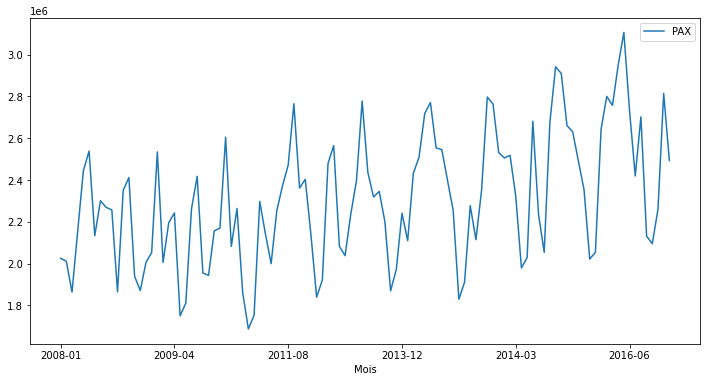

In [52]:
fig, ax = plt.subplots(figsize=(12,6))
ensae[['Mois','PAX','Annee']].groupby('Mois').agg({'PAX':'sum', 'Annee':'max'}).sort_values(by='Annee').plot(ax=ax) 



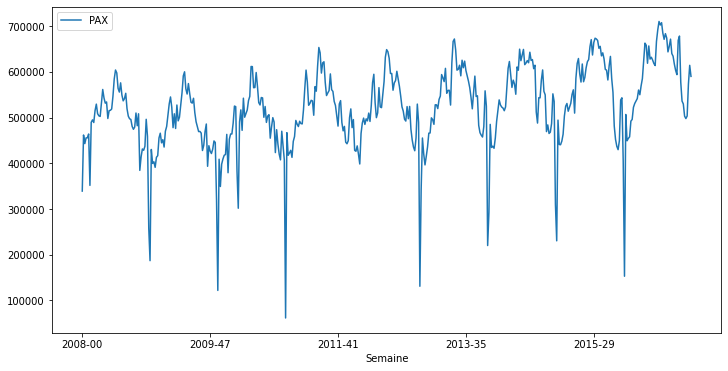

In [53]:
fig, ax = plt.subplots(figsize=(12,6))
ensae[['Semaine','PAX']].groupby('Semaine').agg({'PAX':'sum'}).sort_values(by='Semaine').plot(ax=ax) 



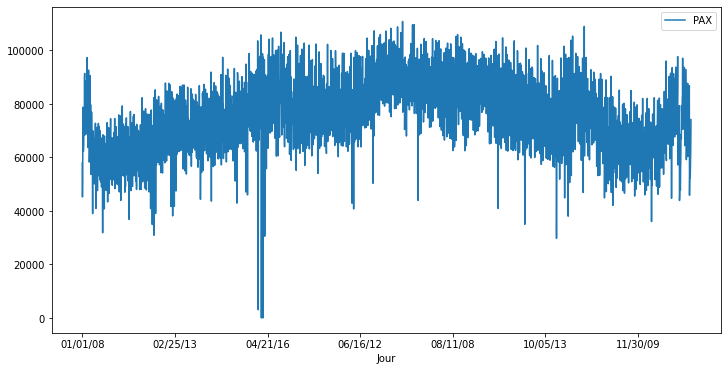

In [55]:
fig, ax = plt.subplots(figsize=(12,6))
ensae[['Jour','PAX']].groupby('Jour').agg({'PAX':'sum'}).plot(ax=ax) 



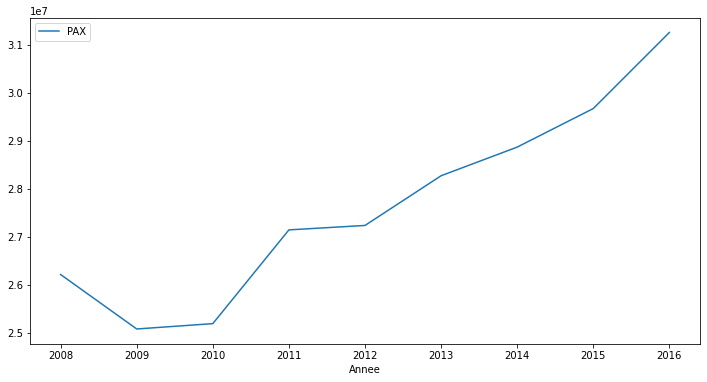

In [63]:
fig, ax = plt.subplots(figsize=(12,6))
ensae[['Annee','PAX']].groupby('Annee').agg({'PAX':'sum'}).plot(ax=ax) 



In [67]:
ensae.head()

,Unnamed: 0,Date,Faisceau,Pays,Ville,Terrain,Terminal,Aerog,Aerop,Code Aerop,Cie,Code Cie,ArrDep,NumVol,TypAv,MVT,PAX,Date Equiv,MVT_FQM,PAX_FQM,Coeff_Rempl_FQM,Sièges Corrections_ICI,Annee,Mois,Semaine,Jour
27691,27691,2008-01-01,Schengen,ITALIE,Venise Marco Polo,ORLY,ORYS,ORYS,Venise Marco Polo,LIPZ,MYAIR,MYW,Départ,MYW2803,320,1.0,154.0,NaT,NaN,NaN,NaN,177.654550,2008,2008-01,2008-00,01/01/08
38407,38407,2008-01-01,National,FRANCE,Marseille,ORLY,ORYW,ORYO,Marseille,LFML,AIR FRANCE,AFR,Arrivée,AFR6015,320,1.0,81.0,NaT,NaN,NaN,NaN,177.654550,2008,2008-01,2008-00,01/01/08
35484,35484,2008-01-01,Schengen,ESPAGNE,Madrid Barajas,ORLY,ORYW,ORYO,Madrid Barajas,LEMD,IBERIA,IBE,Départ,IBE3445,320,1.0,156.0,NaT,NaN,NaN,NaN,177.654550,2008,2008-01,2008-00,01/01/08
13934,13934,2008-01-01,International,ALGERIE,Alger Houari Boumediene,ORLY,ORYS,ORYS,Alger Houari Boumediene,DAAG,AIR ALGERIE,DAH,Arrivée,DAH1008,738,1.0,145.0,NaT,NaN,NaN,NaN,176.363083,2008,2008-01,2008-00,01/01/08
218238,218238,2008-01-01,National,FRANCE,Toulouse Blagnac,ORLY,ORYW,ORYO,Toulouse Blagnac,LFBO,AIR FRANCE,AFR,Départ,AFR6124,321,1.0,55.0,NaT,NaN,NaN,NaN,203.635683,2008,2008-01,2008-00,01/01/08


In [68]:
ensae['Coeff_Rempl']=ensae['PAX'].div(ensae['Sièges Corrections_ICI'])

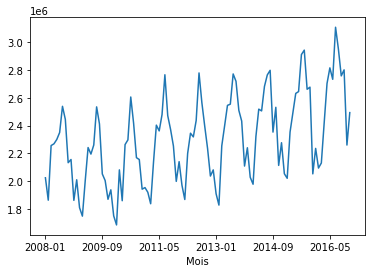

In [81]:
df = ensae[['Mois','PAX', 'Coeff_Rempl']].groupby('Mois').agg({'PAX':'sum', 'Coeff_Rempl':'mean'})
df['PAX'].plot()

In [104]:
#Moving average and moving std
pax_rm = df['PAX'].rolling(window = 4).mean()
cr_rm = df['Coeff_Rempl'].rolling(window = 4).mean()
pax_rstd = df['PAX'].rolling(window = 4).std()
cr_rstd = df['Coeff_Rempl'].rolling(window = 4).std()


## Moyennes mobiles et écart type

On observe les moyennes mobiles et autocorrélations des données. On choisit de travailler ici sur les données hebdomadaires.

In [115]:
def plot_mov_avg_std(n):
  #Moving average and moving std
  pax_rm = df['PAX'].rolling(window=n).mean()
  cr_rm = df['Coeff_Rempl'].rolling(window=n).mean()
  pax_rstd = df['PAX'].rolling(window =n).std()
  cr_rstd = df['Coeff_Rempl'].rolling(window = n).std()

  fig, ax = plt.subplots(2, 1, figsize=(10,10))

  ax[0].plot(df['PAX'], color = 'blue', label = 'Origine')
  ax[0].plot(pax_rm, color = 'red', label = 'Moyenne mobile')
  ax[0].plot(pax_rstd, color = 'black', label = 'Ecart-type mobile')
  ax[0].legend(loc = 'best')
  ax[0].set_title('Moyenne et Ecart-type mobiles pour le nombre mensuel de passagers réalisés')


  ax[1].plot(df['Coeff_Rempl'], color = 'blue', label = 'Origine')
  ax[1].plot(cr_rm, color = 'red', label = 'Moyenne mobile') 
  ax[1].plot(cr_rstd, color = 'black', label = 'Ecart-type mobile')
  ax[1].legend(loc = 'best')
  ax[1].set_title('Moyenne et Ecart-type mobiles pour le coefficient moyen mensuel de remplissage')
  plt.show()

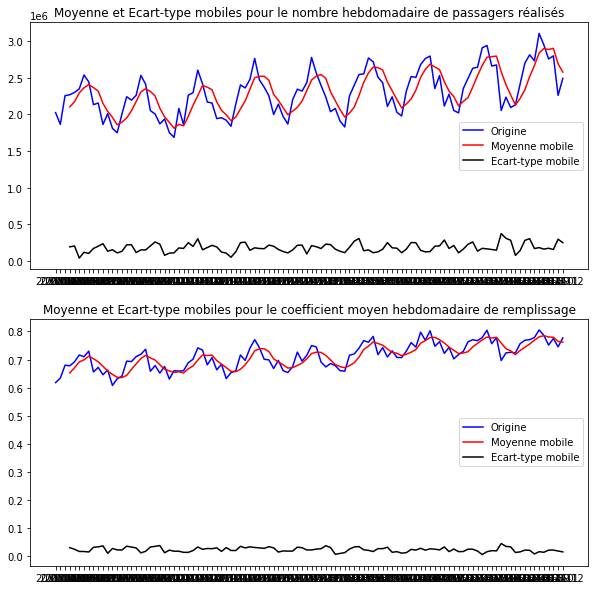

In [108]:
plot_mov_avg_std(4)

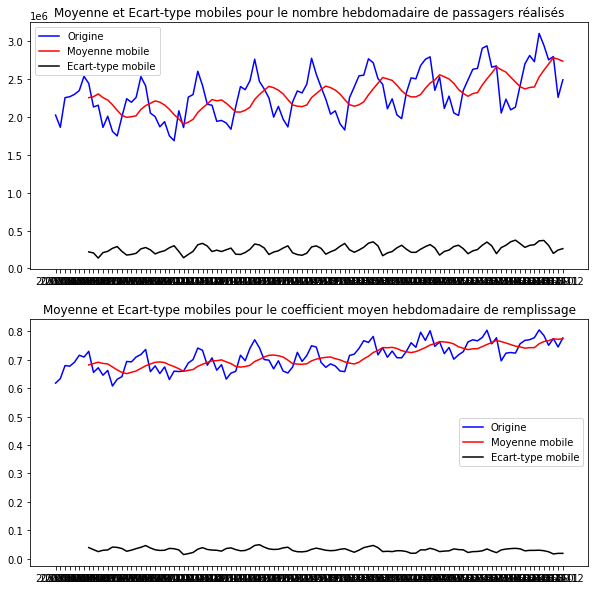

In [110]:
plot_mov_avg_std(8)

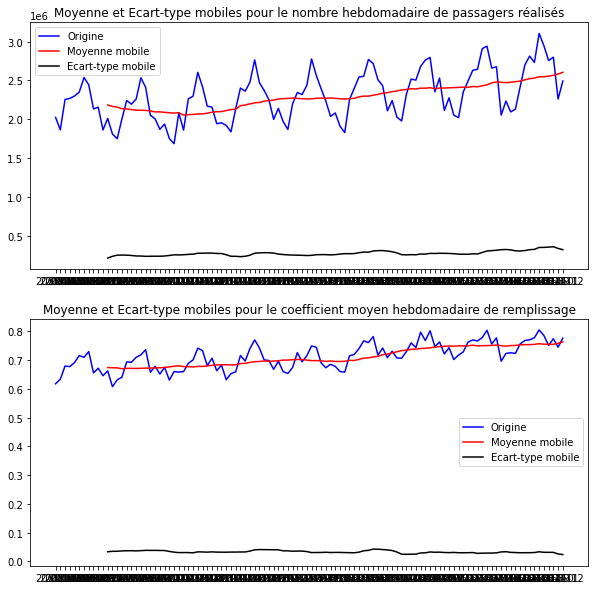

In [111]:
plot_mov_avg_std(12)

En écrasant les périodicités avec un incrément de 12 mois (1 an), on observe que la moyenne mobile ne croît pas énormément, ce qui indique une série possiblement stationnaire.

On reproduit le travail précédent en tenant compte des faisceaux.

In [127]:
def plot_mm_em_fsc(n, agreg_temps):
  sns.set(style='darkgrid')
  faisceaux = pd.unique(ensae.Faisceau.dropna()).tolist()
  cols = ['MM et EM pour le nombre de passagers réalisés par {}'.format(agreg_temps),'MM et EM pour le coefficient moyen de remplissage par {}'.format(agreg_temps)]
  fig, ax = plt.subplots(5,2, figsize=(40,35))



  for axi, col in zip(ax[0], cols):
      axi.set_title(col,fontsize=26)

  for axi, row in zip(ax[:,0], faisceaux):
      axi.set_ylabel(row, rotation=90,fontsize=26)

  fig.tight_layout()


  for i in range(5) :  
      ensae[ensae['Faisceau'].isin([faisceaux[i]])].groupby(agreg_temps).agg({'PAX':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
      df = ensae[ensae['Faisceau'].isin([faisceaux[i]])][[agreg_temps,'PAX', 'Coeff_Rempl']].groupby(agreg_temps).agg({'PAX':'sum', 'Coeff_Rempl':'mean'})
      # calcul des données mobiles 
      pax_rm = df['PAX'].rolling(window=n).mean()
      cr_rm = df['Coeff_Rempl'].rolling(window=n).mean()
      pax_rstd = df['PAX'].rolling(window =n).std()
      cr_rstd = df['Coeff_Rempl'].rolling(window = n).std()

      df['PAX'].plot(color = 'blue', label = 'Origine',ax = ax[(i,0)])
      pax_rm.plot( color = 'red', label = 'Moyenne mobile',ax = ax[(i,0)])
      pax_rstd.plot(color = 'black', label = 'Ecart-type mobile',ax = ax[(i,0)])


      ensae[ensae['Faisceau'].isin([faisceaux[i]])].groupby(agreg_temps).agg({'Coeff_Rempl':'mean'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='firebrick')
      df['Coeff_Rempl'].plot(color = 'blue', label = 'Origine',ax = ax[(i,1)])
      cr_rm.plot( color = 'red', label = 'Moyenne mobile',ax = ax[(i,1)])
      cr_rstd.plot(color = 'black', label = 'Ecart-type mobile',ax = ax[(i,1)])

      
  plt.show()


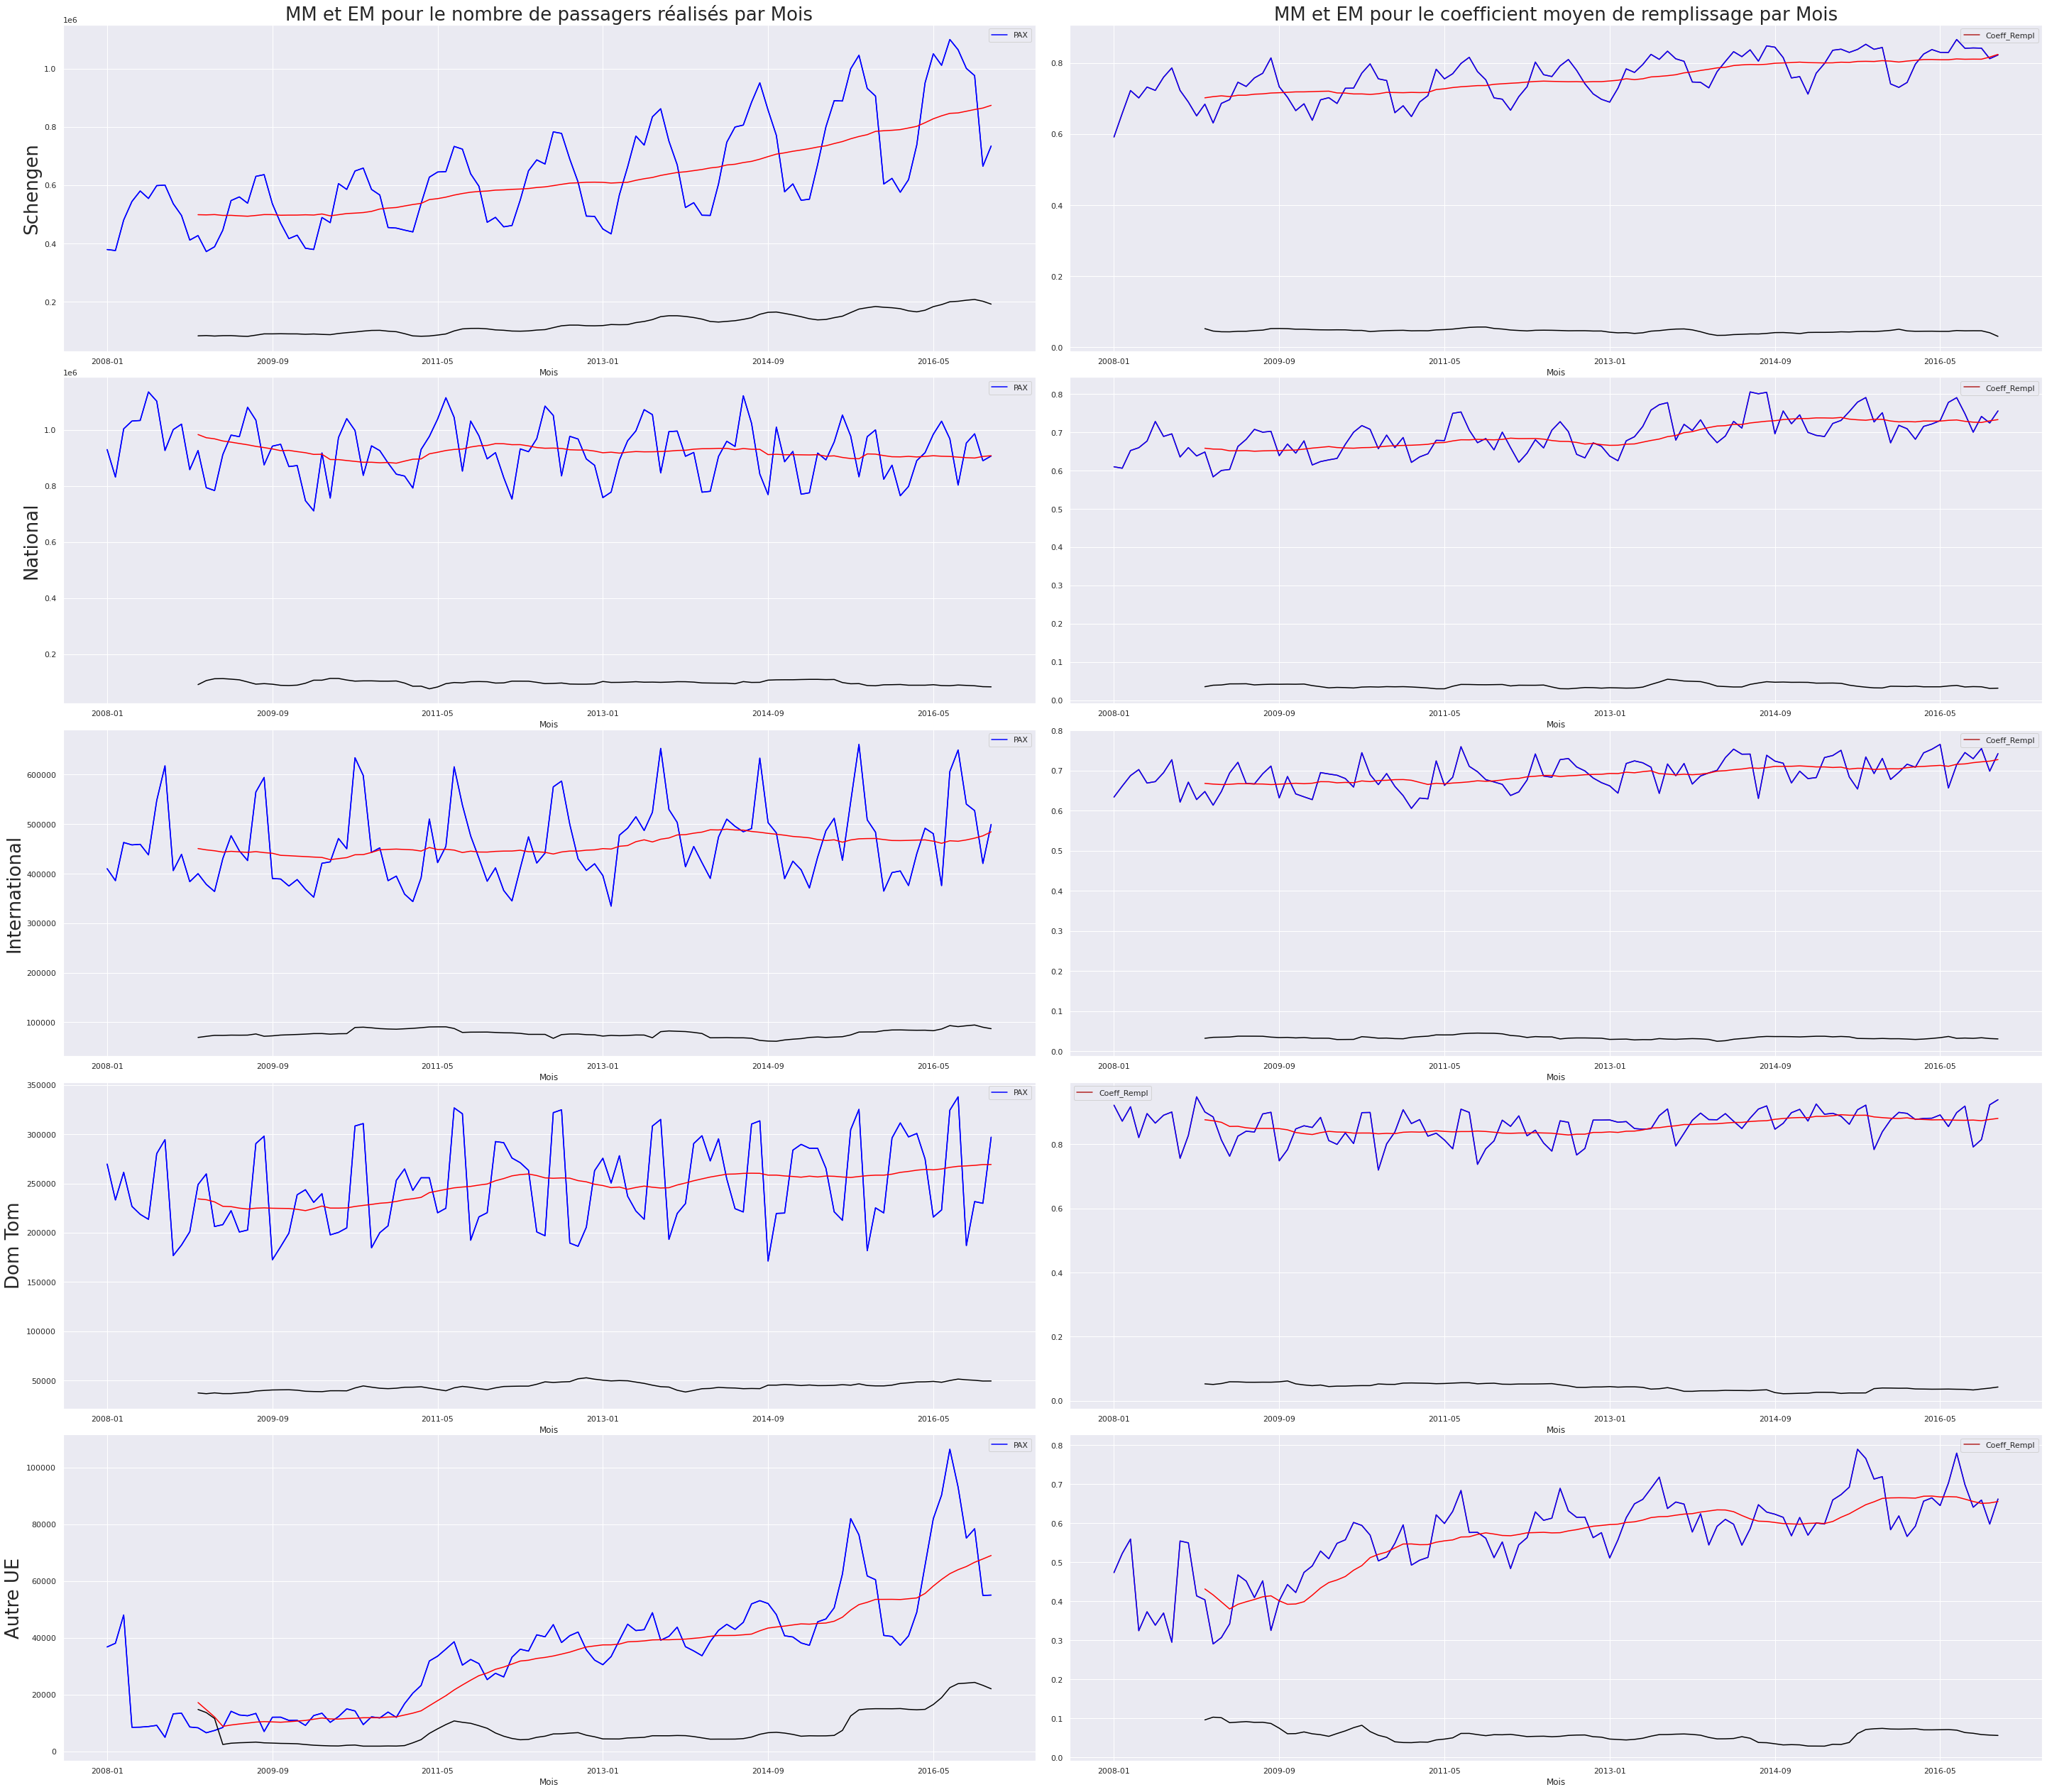

In [128]:
plot_mm_em_fsc(12,'Mois')

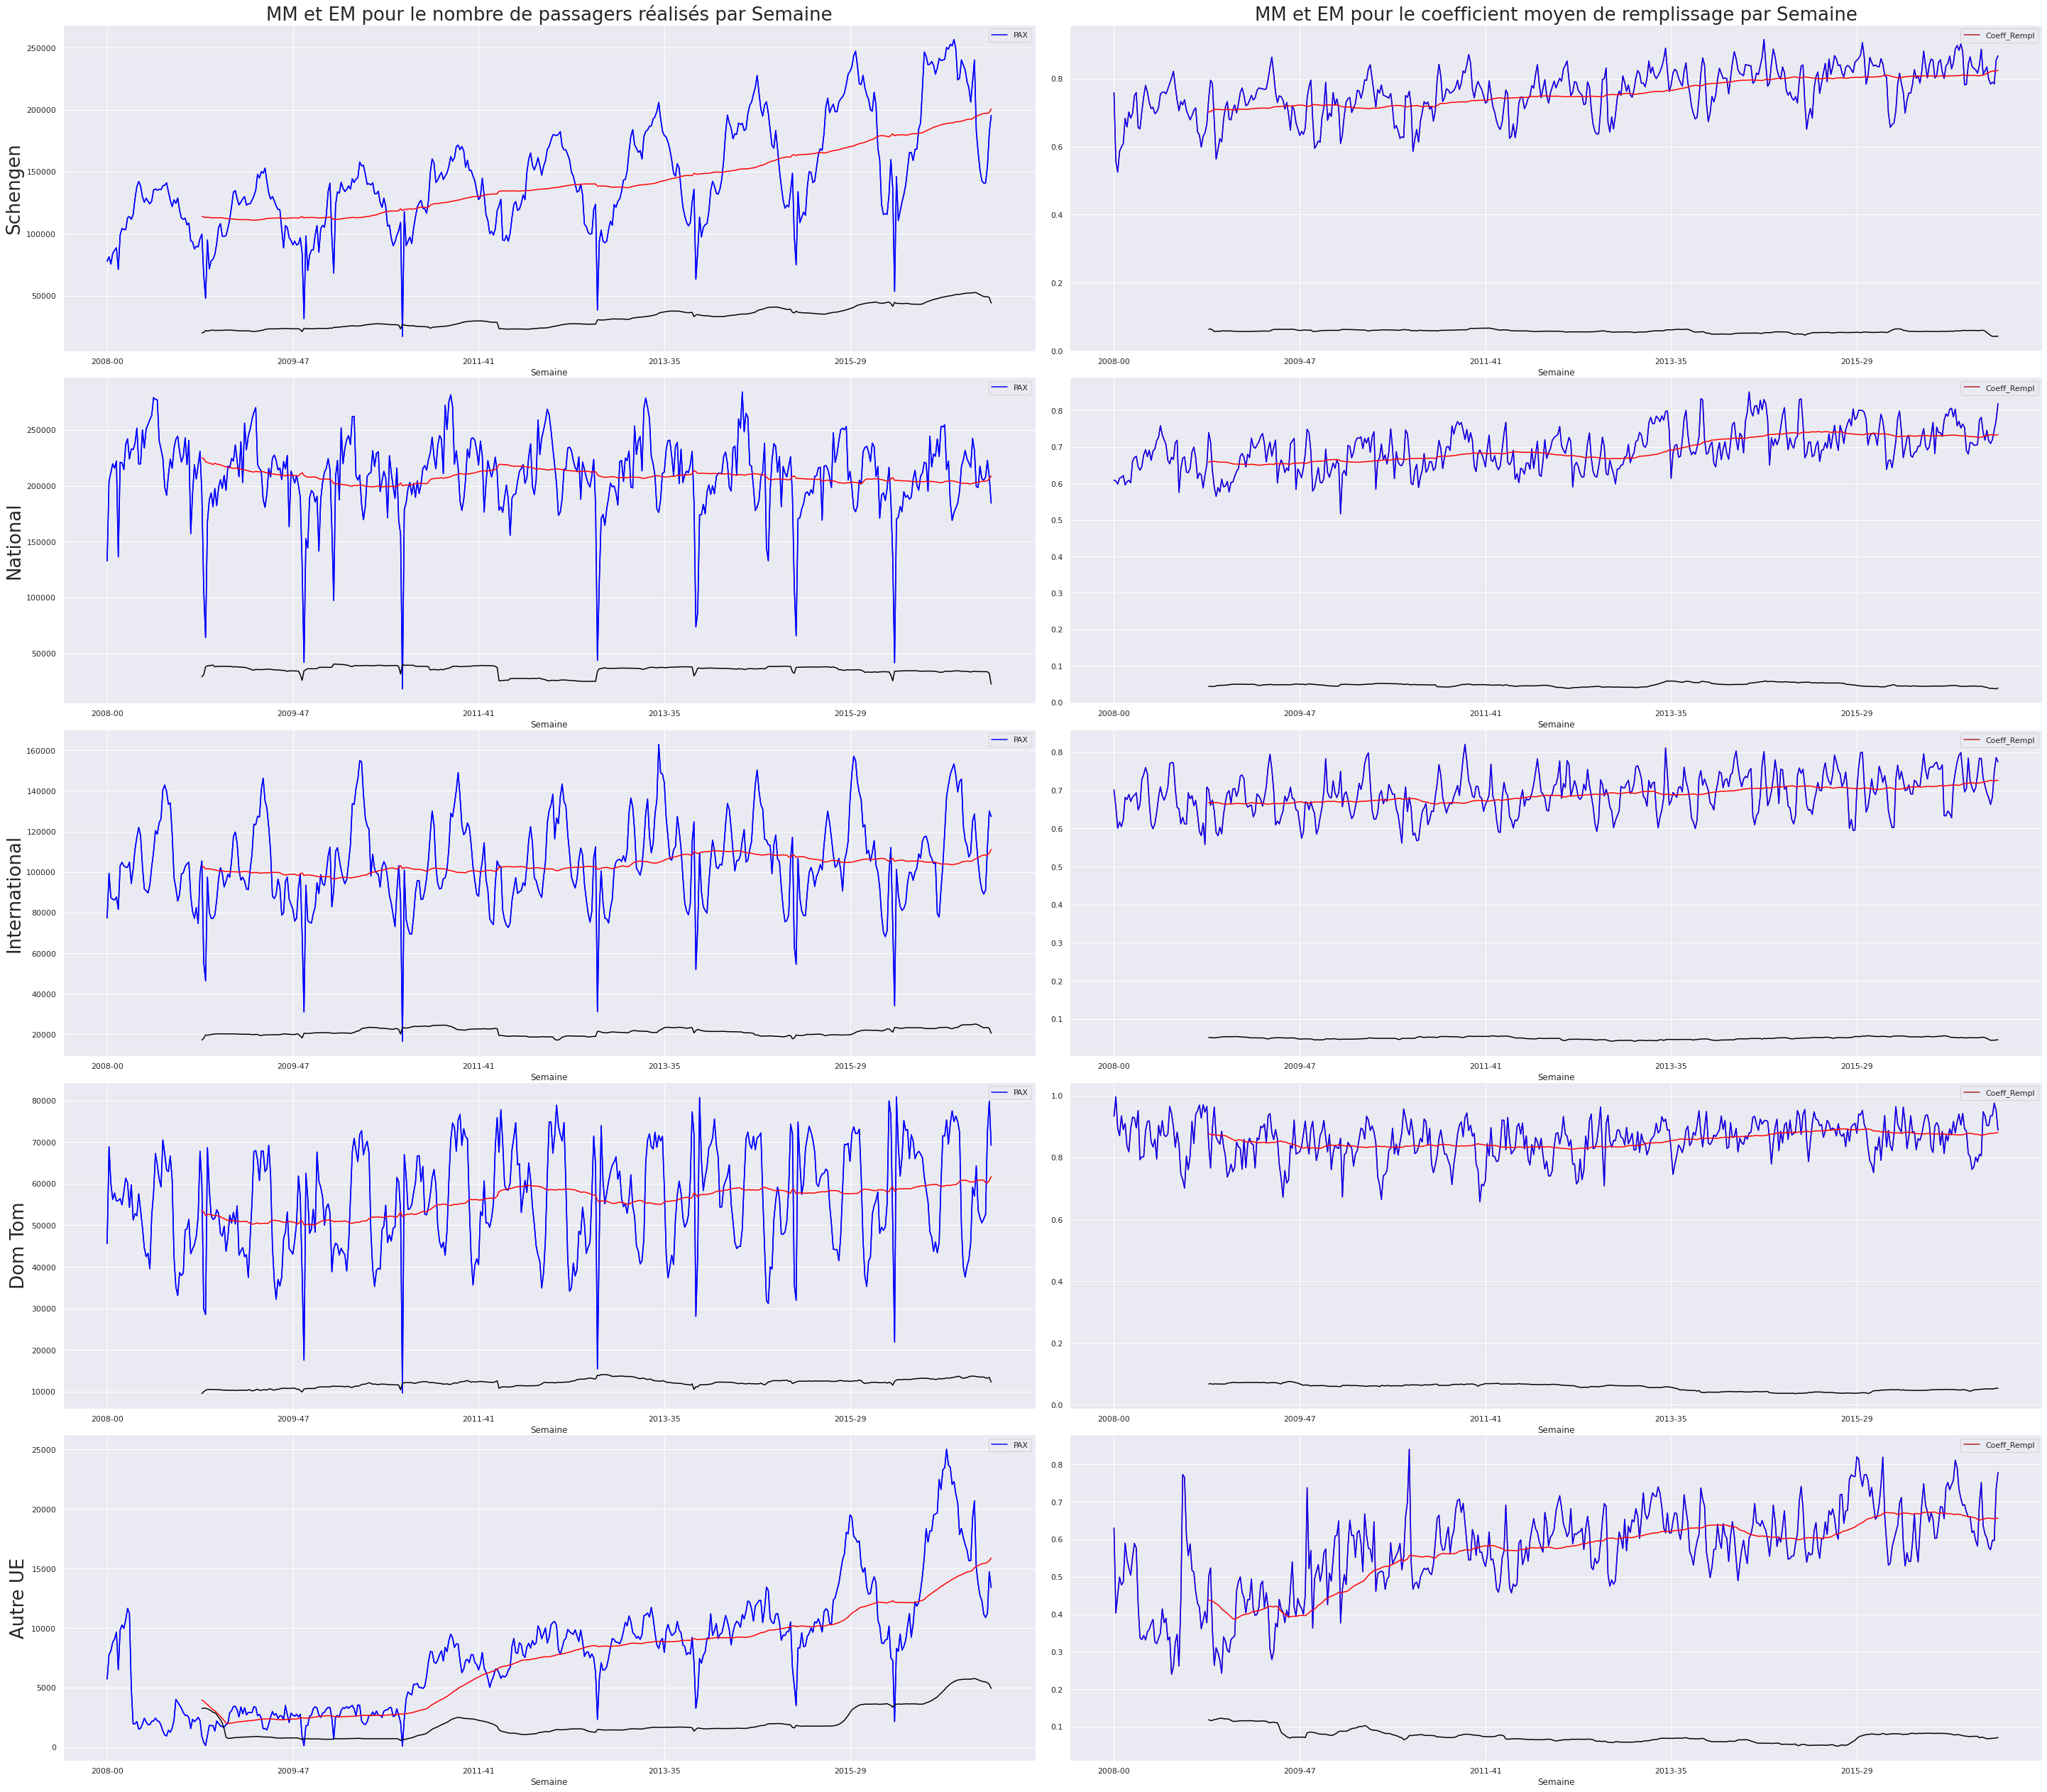

In [132]:
plot_mm_em_fsc(52,'Semaine')

In [ ]:

# Creating data. 
data = ensae[['Semaine','PAX']].groupby('Semaine').agg({'PAX':'sum'})
    
# Adding plot title. 
plt.title("Autocorrelation Plot") 
  
# Providing x-axis name. 
plt.xlabel("Lags") 
  
# Plotting the Autocorreleation plot. 
plt.acorr(data, maxlags = 20)  
  
# Displaying the plot. 
print("The Autocorreleation plot for the data is:") 
plt.grid(True) 